In [192]:
import pandas as pd
import os

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

In [193]:
file_path=os.path.join(os.getcwd(),"Transformed_data","EDA.csv")

df = pd.read_csv(file_path)

In [194]:
df=df.drop(columns=["Customer_Location","Location"])

In [195]:
df.head()

,Artist_Reputation,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Cost
0,Low_Reputation,4128.000000,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,-283.29
1,Low_Reputation,61.000000,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,-159.96
2,Low_Reputation,237.000000,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,-154.29
3,Low_Reputation,1312.229333,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,-161.16
4,Low_Reputation,324.000000,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,-159.23


In [196]:
df.head()

,Artist_Reputation,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Cost
0,Low_Reputation,4128.000000,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,-283.29
1,Low_Reputation,61.000000,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,-159.96
2,Low_Reputation,237.000000,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,-154.29
3,Low_Reputation,1312.229333,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,-161.16
4,Low_Reputation,324.000000,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,-159.23


#### Train Test Split


In [197]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X = df.drop('Cost', axis=1)  # Features (excluding the target column)
y = df['Cost'].abs()  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Check the shapes of the resulting sets
print("Training set - X shape:", X_train.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Testing set - y shape:", y_test.shape)

Training set - X shape: (3573, 11)
Training set - y shape: (3573,)
Testing set - X shape: (631, 11)
Testing set - y shape: (631,)


#### Data Distribution

In [198]:
def split_numerical_categorical_labels(df):
    """
    Identify and return labels of numerical and categorical columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - numerical_labels: List of labels for numerical columns
    - categorical_labels: List of labels for categorical columns
    """
    # Identify numerical columns
    numerical_labels = list(df.select_dtypes(include=['number']).columns)

    # Identify categorical columns
    categorical_labels = list(df.select_dtypes(include=['object', 'category']).columns)

    return numerical_labels, categorical_labels


numerical_labels, categorical_labels = split_numerical_categorical_labels(df=X_train)

In [199]:
numerical_labels

['Weight', 'Price_Of_Sculpture', 'Base_Shipping_Price']

In [200]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information']

In [201]:
y_train

3390    1185.83
3912     861.29
139      262.19
3756     236.08
266      374.95
         ...   
3444     177.22
466      482.86
3092     156.71
3772     101.81
860      534.86
Name: Cost, Length: 3573, dtype: float64

In [202]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information']

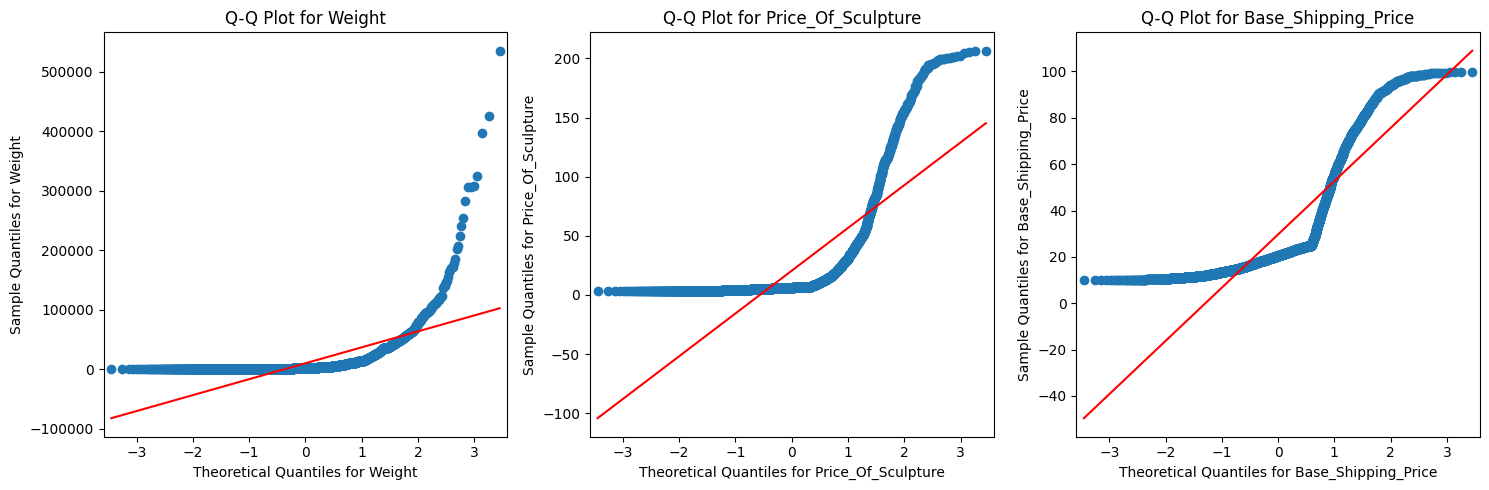

In [203]:
def plot_qq_plots(dataframe, column_labels, plots_per_row=3):
    # Check if the columns exist in the DataFrame
    for label in column_labels:
        if label not in dataframe.columns:
            raise ValueError(f"Column '{label}' not found in the DataFrame.")

    # Calculate the number of rows needed
    num_columns = len(column_labels)
    num_rows = (num_columns + plots_per_row - 1) // plots_per_row

    # Create Q-Q plots
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

    for i, label in enumerate(column_labels):
        row_idx = i // plots_per_row
        col_idx = i % plots_per_row

        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
        sm.qqplot(dataframe[label], line='s', ax=ax)
        ax.set_xlabel(f'Theoretical Quantiles for {label}')
        ax.set_ylabel(f'Sample Quantiles for {label}')
        ax.set_title(f'Q-Q Plot for {label}')

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()
    plt.show()

plot_qq_plots(dataframe=X_train, column_labels=numerical_labels)

In [204]:
import numpy as np

# Base 2 logarithm transform the specified numerical columns
X_train[numerical_labels] = np.log2(X_train[numerical_labels] + 1)  # Adding 1 to handle zero values # Adding 1 to handle zero values
X_test[numerical_labels] = np.log2(X_test[numerical_labels] + 1)

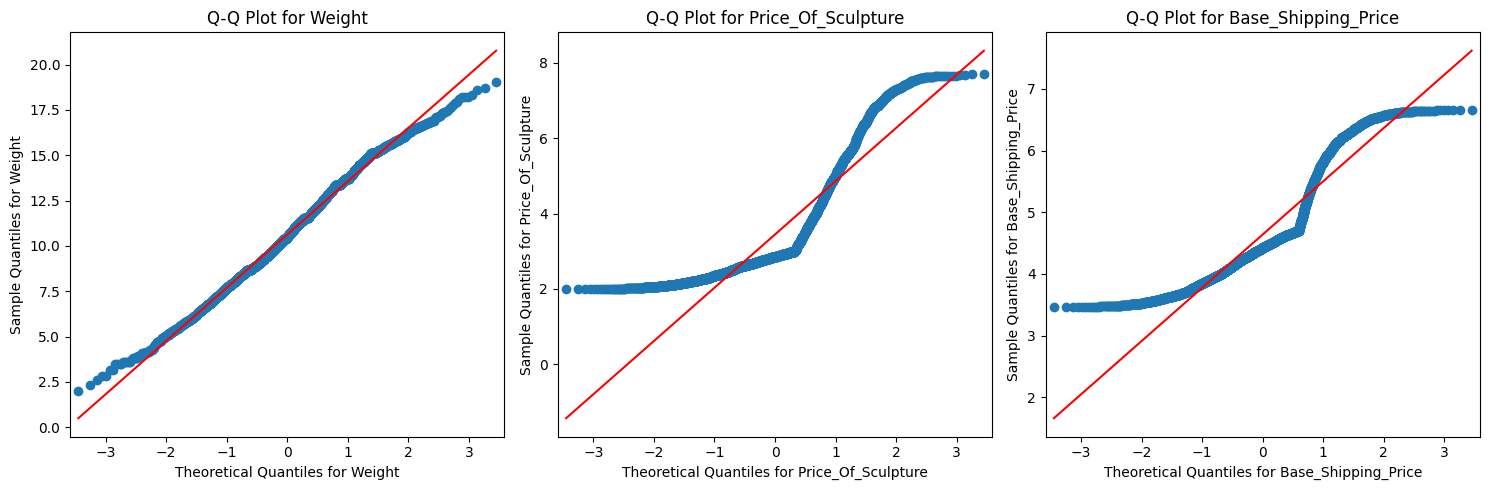

In [205]:
plot_qq_plots(dataframe=X_train, column_labels=numerical_labels)

In [206]:
X_train[categorical_labels]

,Artist_Reputation,Material,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information
3390,High_Reputation,Aluminium,No,Yes,No,Roadways,No,Wealthy
3912,Moderate_Reputation,Brass,No,No,No,Roadways,No,Working Class
139,Moderate_Reputation,Wood,No,Yes,No,Roadways,No,Working Class
3756,Low_Reputation,Bronze,No,No,Yes,Roadways,No,Working Class
266,High_Reputation,Stone,Yes,Yes,No,Airways,No,Working Class
...,...,...,...,...,...,...,...,...
3444,Low_Reputation,Wood,No,No,Yes,Roadways,No,Working Class
466,Moderate_Reputation,Aluminium,Yes,No,Yes,Airways,No,Working Class
3092,Low_Reputation,Aluminium,No,No,No,Roadways,No,Wealthy
3772,Low_Reputation,Aluminium,No,No,No,Roadways,No,Working Class


In [207]:
def print_unique_counts(dataframe, column_labels):
    for label in column_labels:
        unique_counts = dataframe[label].nunique()
        print(f"Unique count for column '{label}': {unique_counts}")


# Call the function with your DataFrame and column labels
print_unique_counts(dataframe=X_train, column_labels=categorical_labels)

Unique count for column 'Artist_Reputation': 4
Unique count for column 'Material': 7
Unique count for column 'International': 2
Unique count for column 'Express_Shipment': 2
Unique count for column 'Installation_Included': 2
Unique count for column 'Transport': 3
Unique count for column 'Fragile': 2
Unique count for column 'Customer_Information': 2


In [208]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information']

In [209]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(X_train, X_test, categorical_columns):
    # Create a column transformer with OneHotEncoder
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(), categorical_columns)
        ],
        remainder='passthrough'  # Pass through any non-categorical columns unchanged
    )

    # Create a pipeline with the preprocessor
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        # Add more steps here if needed
    ])

    # Fit and transform on the training data
    X_train_encoded_array = pipeline.fit_transform(X_train)

    # Transform the test data
    X_test_encoded_array = pipeline.transform(X_test)

    # Get the names of the new columns after one-hot encoding
    new_columns = preprocessor.get_feature_names_out()

    # Convert the transformed arrays back to DataFrames
    X_train_encoded = pd.DataFrame(X_train_encoded_array, columns=new_columns)
    X_test_encoded = pd.DataFrame(X_test_encoded_array, columns=new_columns)

    return X_train_encoded, X_test_encoded



X_train, X_test = one_hot_encode(X_train, X_test, categorical_columns=categorical_labels)


In [210]:
X_train

,onehot__Artist_Reputation_High_Reputation,onehot__Artist_Reputation_Low_Reputation,onehot__Artist_Reputation_Moderate_Reputation,onehot__Artist_Reputation_Very_High_Reputation,onehot__Material_Aluminium,onehot__Material_Brass,onehot__Material_Bronze,onehot__Material_Clay,onehot__Material_Marble,onehot__Material_Stone,...,onehot__Transport_Airways,onehot__Transport_Roadways,onehot__Transport_Waterways,onehot__Fragile_No,onehot__Fragile_Yes,onehot__Customer_Information_Wealthy,onehot__Customer_Information_Working Class,remainder__Weight,remainder__Price_Of_Sculpture,remainder__Base_Shipping_Price
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,10.733863,3.922198,4.670161
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,12.890074,4.636915,6.638798
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,6.169925,2.845992,4.605850
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,11.450180,2.289834,4.689299
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,11.974056,4.879706,3.749534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,8.447083,2.615887,4.530445
3569,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,9.840778,2.893362,4.441616
3570,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.392317,2.662205,4.258519
3571,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7.149747,2.634593,3.782409


In [211]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

class RegressionModels:
    def __init__(self):
        self.models = {
            'Linear Regression': LinearRegression(),
            'Ridge Regression': Ridge(),
            'Lasso Regression': Lasso(),
            'Gradient Boosting': GradientBoostingRegressor(),
            'AdaBoost': AdaBoostRegressor(),
            'Decision Tree': DecisionTreeRegressor(),
            'Random Forest': RandomForestRegressor(),
            'KNeighbors': KNeighborsRegressor()
        }
        self.trained_models = {}

    def train_models(self, X_train, y_train):
        for model_name, model in self.models.items():
            if 'Regression' in model_name:
                # For linear regression models, use standard scaling
                pipeline = make_pipeline(StandardScaler(), model)
            else:
                # For other models, no need for scaling
                pipeline = model
            pipeline.fit(X_train, y_train)
            self.trained_models[model_name] = pipeline

    def predict_models(self, X_test):
        predictions = {}
        for model_name, model in self.trained_models.items():
            predictions[model_name] = model.predict(X_test)
        return predictions

    def evaluate_models(self, y_true, predictions):
        evaluations = {}
        for model_name, y_pred in predictions.items():
            mse = mean_squared_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)
            evaluations[model_name] = {'Mean Squared Error': mse, 'R2 Score': r2}
        return evaluations

# Example usage:
# Assuming X_train, y_train, X_test, y_test are your training and testing sets

# Create an instance of the RegressionModels class
regression_models = RegressionModels()

# Train the models on the training data
regression_models.train_models(X_train, y_train)

# Predict using the trained models on the test data
predictions = regression_models.predict_models(X_test)

# Create a list of dictionaries to store the data
data_list = []

# Populate the list with evaluation results
for model_name, metrics in evaluations.items():
    data_list.append({
        'Model Name': model_name,
        'Mean Squared Error': metrics['Mean Squared Error'],
        'R2 Score': metrics['R2 Score']
    })

# Create a DataFrame from the list
results_df = pd.DataFrame(data_list)

# Display the DataFrame
print("\nEvaluations DataFrame:")
print(results_df)

# Display the evaluations
for model_name, metrics in evaluations.items():
    print(f"\n{model_name} Evaluation:")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R2 Score: {metrics['R2 Score']}")


# Display the evaluations
for model_name, metrics in evaluations.items():
    print(f"\n{model_name} Evaluation:")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R2 Score: {metrics['R2 Score']}")



Evaluations DataFrame:
          Model Name  Mean Squared Error  R2 Score
0  Linear Regression        80118.391525  0.621439
1   Ridge Regression        80595.604315  0.619184
2   Lasso Regression        80903.598980  0.617729
3  Gradient Boosting        71395.263752  0.662656
4           AdaBoost       110226.513793  0.479177
5      Decision Tree       109375.263976  0.483200
6      Random Forest        67230.022764  0.682337
7         KNeighbors        94262.534859  0.554608

Linear Regression Evaluation:
Mean Squared Error: 80118.39152478057
R2 Score: 0.621438898810807

Ridge Regression Evaluation:
Mean Squared Error: 80595.6043149053
R2 Score: 0.6191840582443273

Lasso Regression Evaluation:
Mean Squared Error: 80903.59898011443
R2 Score: 0.6177287769112528

Gradient Boosting Evaluation:
Mean Squared Error: 71395.26375183485
R2 Score: 0.6626558627649447

AdaBoost Evaluation:
Mean Squared Error: 110226.51379332624
R2 Score: 0.4791773817758054

Decision Tree Evaluation:
Mean Squared

In [212]:
# Display the DataFrame
print("\nEvaluations DataFrame:")
print(results_df)


Evaluations DataFrame:
          Model Name  Mean Squared Error  R2 Score
0  Linear Regression        80118.391525  0.621439
1   Ridge Regression        80595.604315  0.619184
2   Lasso Regression        80903.598980  0.617729
3  Gradient Boosting        71395.263752  0.662656
4           AdaBoost       110226.513793  0.479177
5      Decision Tree       109375.263976  0.483200
6      Random Forest        67230.022764  0.682337
7         KNeighbors        94262.534859  0.554608


In [213]:
# Display the DataFrame
print("\nEvaluations DataFrame:")
print(results_df)

# Sort the DataFrame by a metric (e.g., Mean Squared Error or R2 Score)
results_df_sorted_mse = results_df.sort_values(by='Mean Squared Error', ascending=True)
results_df_sorted_r2 = results_df.sort_values(by='R2 Score', ascending=False)

# Display the top 3 models based on Mean Squared Error
top_3_mse = results_df_sorted_mse.head(3)
print("\nTop 3 models based on Mean Squared Error:")
print(top_3_mse)

# Display the top 3 models based on R2 Score
top_3_r2 = results_df_sorted_r2.head(3)
print("\nTop 3 models based on R2 Score:")
print(top_3_r2)


Evaluations DataFrame:
          Model Name  Mean Squared Error  R2 Score
0  Linear Regression        80118.391525  0.621439
1   Ridge Regression        80595.604315  0.619184
2   Lasso Regression        80903.598980  0.617729
3  Gradient Boosting        71395.263752  0.662656
4           AdaBoost       110226.513793  0.479177
5      Decision Tree       109375.263976  0.483200
6      Random Forest        67230.022764  0.682337
7         KNeighbors        94262.534859  0.554608

Top 3 models based on Mean Squared Error:
          Model Name  Mean Squared Error  R2 Score
6      Random Forest        67230.022764  0.682337
3  Gradient Boosting        71395.263752  0.662656
0  Linear Regression        80118.391525  0.621439

Top 3 models based on R2 Score:
          Model Name  Mean Squared Error  R2 Score
6      Random Forest        67230.022764  0.682337
3  Gradient Boosting        71395.263752  0.662656
0  Linear Regression        80118.391525  0.621439


Feature Importances:
                                           Feature  Importance
25                   remainder__Price_Of_Sculpture    0.387129
26                  remainder__Base_Shipping_Price    0.285410
0        onehot__Artist_Reputation_High_Reputation    0.079767
24                               remainder__Weight    0.066267
1         onehot__Artist_Reputation_Low_Reputation    0.060866
3   onehot__Artist_Reputation_Very_High_Reputation    0.019030
2    onehot__Artist_Reputation_Moderate_Reputation    0.014939
17                       onehot__Transport_Airways    0.008198
5                           onehot__Material_Brass    0.007852
6                          onehot__Material_Bronze    0.005930
14                    onehot__Express_Shipment_Yes    0.005291
13                     onehot__Express_Shipment_No    0.005201
18                      onehot__Transport_Roadways    0.004580
4                       onehot__Material_Aluminium    0.004391
22            onehot__Customer_Inf

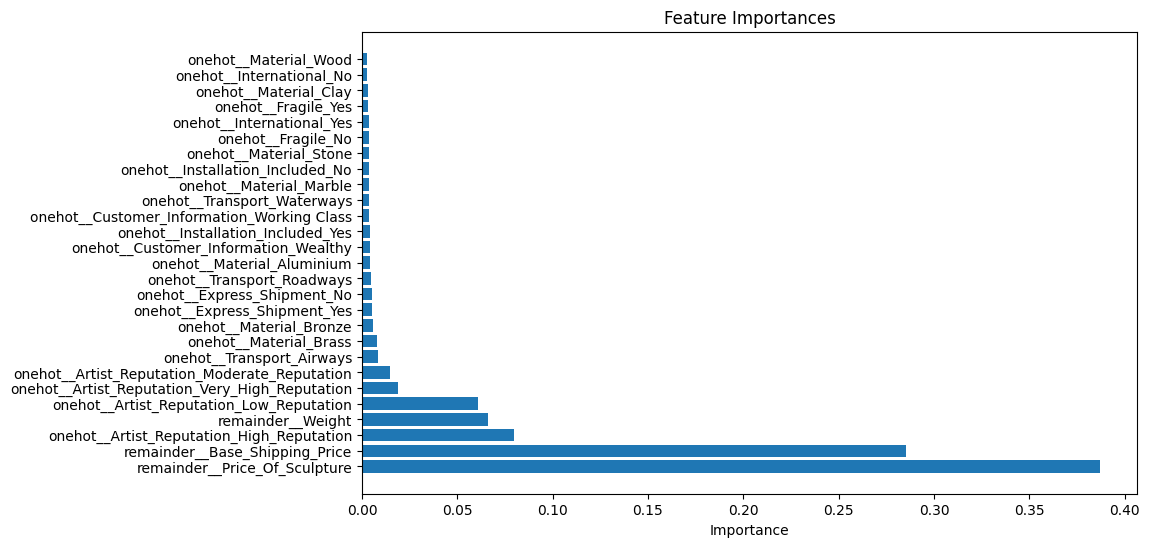

In [214]:
# Assuming you have a DataFrame 'X' with your features and 'y' with the target variable

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor()

# Fit the model to your data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plot the feature importances if you have matplotlib installed
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importances')
    plt.show()
except ImportError:
    print("Matplotlib not installed. Visualization not available.")

In [215]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from tqdm import tqdm

class RandomForestOptunaTuner:
    def __init__(self, X_train, y_train, X_test, y_test, n_trials=50):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.n_trials = n_trials
        self.best_params = None
        self.best_model = None

    def objective(self, trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 10, 100),
            'max_depth': trial.suggest_int('max_depth', 5, 30),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
            'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
        }

        rf = RandomForestRegressor(**params)
        rf.fit(self.X_train, self.y_train)
        y_test_pred = rf.predict(self.X_test)
        r2 = r2_score(self.y_test, y_test_pred)

        return -r2  # Optuna minimizes the objective function, so we use -r2 to maximize R2 score

    def optimize_hyperparameters(self):
        with tqdm(total=self.n_trials, desc="Optimizing", unit="trial") as pbar:
            def callback(study, trial):
                pbar.update(1)

            study = optuna.create_study(direction='maximize')  # Maximize R2 score
            study.optimize(self.objective, n_trials=self.n_trials, callbacks=[callback])

            self.best_params = study.best_params
            self.best_model = RandomForestRegressor(**self.best_params)
            self.best_model.fit(self.X_train, self.y_train)

        # Print the best hyperparameters
        print("\nBest Hyperparameters:")
        print(self.best_params)

    def get_best_model(self):
        return self.best_model,self.best_params


# Assuming X_train, y_train, X_test, and y_test are your training and test data and labels
rf_optuna_tuner = RandomForestOptunaTuner(X_train, y_train, X_test, y_test)
rf_optuna_tuner.optimize_hyperparameters()
best_rf_optuna_model , best_params = rf_optuna_tuner.get_best_model()


Optimizing:   0%|          | 0/50 [00:00<?, ?trial/s][I 2023-11-15 23:12:10,600] A new study created in memory with name: no-name-bf47f831-1ed1-474c-be93-401467d39c92


[I 2023-11-15 23:12:16,635] Trial 0 finished with value: -0.6740691572873556 and parameters: {'n_estimators': 87, 'max_depth': 27, 'min_samples_split': 8, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 0 with value: -0.6740691572873556.
Optimizing:  36%|███▌      | 18/50 [01:28<04:13,  7.91s/trial]

In [188]:
pip install optuna


  Using cached optuna-3.4.0-py3-none-any.whl (409 kB)
  Using cached alembic-1.12.1-py3-none-any.whl (226 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
  Using cached SQLAlchemy-2.0.23-cp311-cp311-win_amd64.whl (2.1 MB)
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
  Using cached PyYAML-6.0.1-cp311-cp311-win_amd64.whl (144 kB)
  Using cached Mako-1.3.0-py3-none-any.whl (78 kB)
  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Using cached greenlet-3.0.1-cp311-cp311-win_amd64.whl (288 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
